<a href="https://colab.research.google.com/github/AmatSaw04/Python-projects/blob/main/Day_100_Analyse_Deaths_involving_Police.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading datasets...

Household Income:
Shape: (29322, 3)
Columns: ['Geographic Area', 'City', 'Median Income']
Missing values: 51
Duplicates: 0

Poverty Rate:
Shape: (29329, 3)
Columns: ['Geographic Area', 'City', 'poverty_rate']
Missing values: 0
Duplicates: 0

High School Graduation:
Shape: (29329, 3)
Columns: ['Geographic Area', 'City', 'percent_completed_hs']
Missing values: 0
Duplicates: 0

Race by City:
Shape: (29268, 7)
Columns: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
Missing values: 0
Duplicates: 0

Police Fatalities:
Shape: (2535, 14)
Columns: ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']
Missing values: 346
Duplicates: 0

Household Income - Missing values:
Median Income    51
dtype: int64

Police Fatalities - Missing values:
armed      9
age       77
race     195
flee      65
dtype: int64
F

/tmp/ipython-input-2000985099.py:92: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fatalities['age'].fillna(median_age, inplace=True)


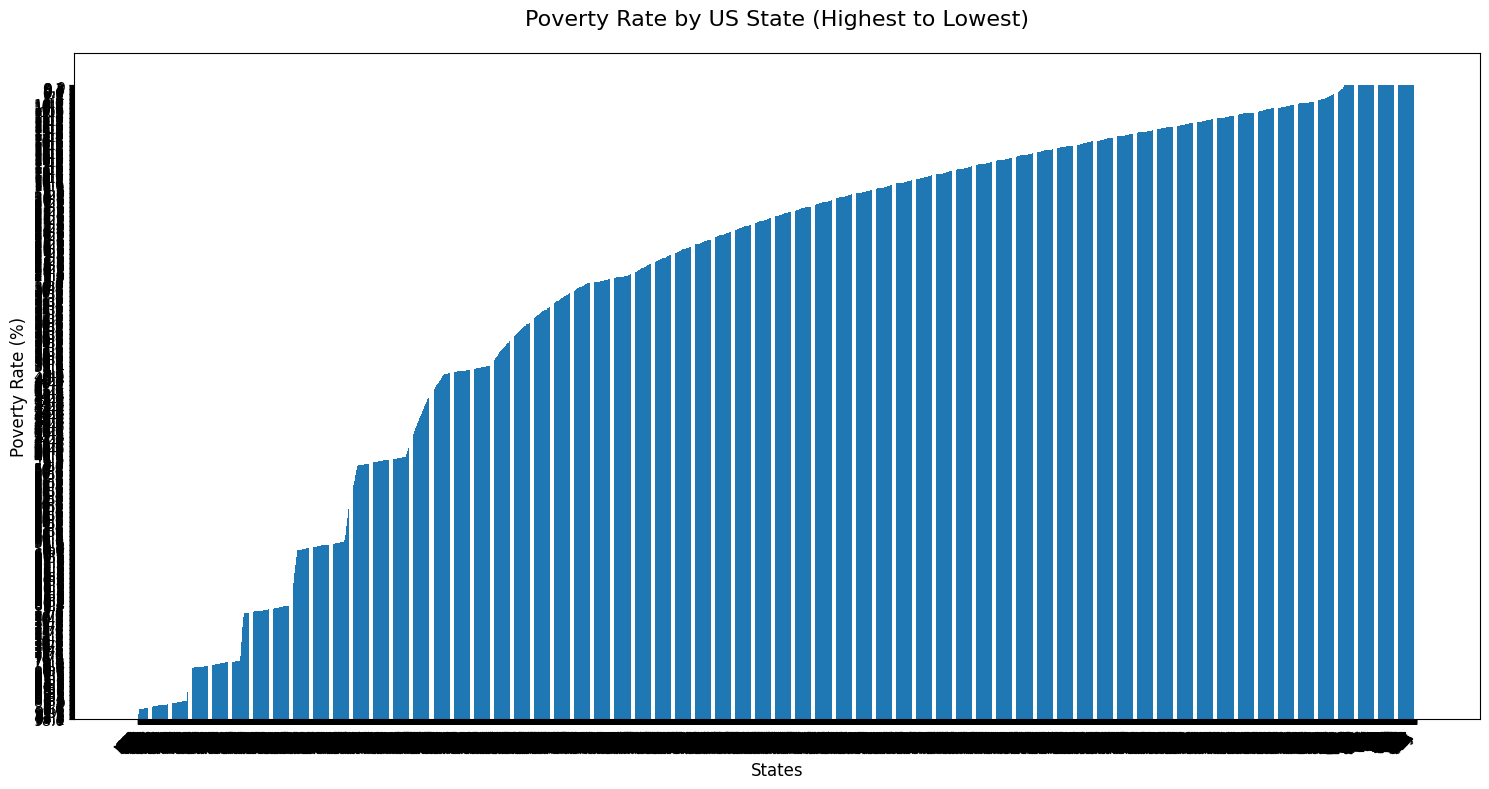

ValueError: Unknown format code 'f' for object of type 'str'

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


pd.options.display.float_format = '{:,.2f}'.format


print("Loading datasets...")
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")


datasets = {
    'Household Income': df_hh_income,
    'Poverty Rate': df_pct_poverty,
    'High School Graduation': df_pct_completed_hs,
    'Race by City': df_share_race_city,
    'Police Fatalities': df_fatalities
}



for name, df in datasets.items():
    print(f"\n{name}:")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Missing values: {df.isnull().sum().sum()}")
    print(f"Duplicates: {df.duplicated().sum()}")



for name, df in datasets.items():
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f"\n{name} - Missing values:")
        print(missing[missing > 0])

if df_fatalities['age'].isnull().sum() > 0:
    median_age = df_fatalities['age'].median()
    df_fatalities['age'].fillna(median_age, inplace=True)
    print(f"Filled {df_fatalities['age'].isnull().sum()} missing ages with median: {median_age}")

print("1. POVERTY RATE BY STATE")

df_poverty_sorted = df_pct_poverty.sort_values('poverty_rate', ascending=False)

plt.figure(figsize=(15, 8))
plt.bar(range(len(df_poverty_sorted)), df_poverty_sorted['poverty_rate'])
plt.title('Poverty Rate by US State (Highest to Lowest)', fontsize=16, pad=20)
plt.xlabel('States', fontsize=12)
plt.ylabel('Poverty Rate (%)', fontsize=12)
plt.xticks(range(len(df_poverty_sorted)), df_poverty_sorted['Geographic Area'],
           rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"Highest poverty rate: {df_poverty_sorted.iloc[0]['Geographic Area']} - {df_poverty_sorted.iloc[0]['poverty_rate']:.2f}%")

print(f"Lowest poverty rate: {df_poverty_sorted.iloc[-1]['Geographic Area']} - {df_poverty_sorted.iloc[-1]['poverty_rate']:.2f}%")


print("2. HIGH SCHOOL GRADUATION RATE BY STATE")
df_hs_sorted = df_pct_completed_hs.sort_values('percent_completed_hs', ascending=True)
plt.figure(figsize=(15, 8))
plt.bar(range(len(df_hs_sorted)), df_hs_sorted['percent_completed_hs'], color='green', alpha=0.7)
plt.title('High School Graduation Rate by US State (Lowest to Highest)', fontsize=16, pad=20)
plt.xlabel('States', fontsize=12)

plt.ylabel('Graduation Rate (%)', fontsize=12)
plt.xticks(range(len(df_hs_sorted)), df_hs_sorted['Geographic Area'],
           rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"Lowest graduation rate: {df_hs_sorted.iloc[0]['Geographic Area']} - {df_hs_sorted.iloc[0]['percent_completed_hs']:.2f}%")
print(f"Highest graduation rate: {df_hs_sorted.iloc[-1]['Geographic Area']} - {df_hs_sorted.iloc[-1]['percent_completed_hs']:.2f}%")


print("3. POVERTY vs EDUCATION RELATIONSHIP")
df_poverty_education = pd.merge(df_pct_poverty, df_pct_completed_hs, on='Geographic Area')

fig, ax1 = plt.subplots(figsize=(15, 8))

df_pe_sorted = df_poverty_education.sort_values('poverty_rate')
color = 'tab:red'
ax1.set_xlabel('States (sorted by poverty rate)', fontsize=12)
ax1.set_ylabel('Poverty Rate (%)', color=color, fontsize=12)
ax1.plot(range(len(df_pe_sorted)), df_pe_sorted['poverty_rate'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(len(df_pe_sorted)))
ax1.set_xticklabels(df_pe_sorted['Geographic Area'], rotation=45, ha='right')
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('High School Graduation Rate (%)', color=color, fontsize=12)
ax2.plot(range(len(df_pe_sorted)), df_pe_sorted['percent_completed_hs'], color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Poverty Rate vs High School Graduation Rate by State', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.jointplot(data=df_poverty_education, x='poverty_rate', y='percent_completed_hs',
              kind='scatter', height=8)
plt.suptitle('Poverty Rate vs High School Graduation Rate', y=1.02)
plt.show()


plt.figure(figsize=(10, 6))
sns.regplot(data=df_poverty_education, x='poverty_rate', y='percent_completed_hs')
plt.title('Linear Regression: Poverty Rate vs High School Graduation Rate')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('High School Graduation Rate (%)')
plt.show()

# Calculate correlation
correlation = df_poverty_education['poverty_rate'].corr(df_poverty_education['percent_completed_hs'])
print(f"Correlation between poverty rate and high school graduation rate: {correlation:.3f}")


# 4. RACIAL MAKEUP BY STATE
print("4. RACIAL MAKEUP BY STATE")
print("="*50)

race_columns = ['share_white', 'share_black', 'share_native_american',
                'share_asian', 'share_hispanic']

plt.figure(figsize=(15, 10))
bottom = np.zeros(len(df_share_race_city))
colors = ['lightblue', 'orange', 'green', 'red', 'purple']
labels = ['White', 'Black', 'Native American', 'Asian', 'Hispanic']
for i, (col, color, label) in enumerate(zip(race_columns, colors, labels)):

    plt.bar(range(len(df_share_race_city)), df_share_race_city[col],

            bottom=bottom, color=color, alpha=0.8, label=label)

    bottom += df_share_race_city[col]



plt.title('Racial Composition by US State', fontsize=16, pad=20)

plt.xlabel('States', fontsize=12)

plt.ylabel('Population Share', fontsize=12)

plt.xticks(range(len(df_share_race_city)), df_share_race_city['Geographic area'],

           rotation=45, ha='right')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()


print("\n" + "="*50)
print("5. PEOPLE KILLED BY RACE")
print("="*50)

race_counts = df_fatalities['race'].value_counts()
print("People killed by race:")
print(race_counts)

plt.figure(figsize=(10, 8))

colors = ['lightblue', 'orange', 'lightgreen', 'red', 'purple', 'yellow']

wedges, texts, autotexts = plt.pie(race_counts.values, labels=race_counts.index,

                                   autopct='%1.1f%%', startangle=90, colors=colors)


centre_circle = plt.Circle((0,0), 0.70, fc='white')

fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.title('Distribution of Police Killings by Race', fontsize=16, pad=20)

plt.axis('equal')

plt.show()


print("\n" + "="*50)

print("6. DEATHS BY GENDER")

print("="*50)

gender_counts = df_fatalities['gender'].value_counts()

print("Deaths by gender:")

print(gender_counts)
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['lightblue', 'pink'])
plt.title('Police Killings by Gender', fontsize=16)

plt.xlabel('Gender')

plt.ylabel('Number of Deaths')

for i, v in enumerate(gender_counts.values):

    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.show()
print(f"Men are killed {gender_counts['M'] / gender_counts['F']:.1f} times more often than women")


print("\n" + "="*50)

print("7. AGE DISTRIBUTION BY MANNER OF DEATH")

print("="*50)
plt.figure(figsize=(12, 8))

sns.boxplot(data=df_fatalities, x='manner_of_death', y='age', hue='gender')
plt.title('Age Distribution by Manner of Death and Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print("\n" + "="*50)
print("8. WEAPONS ANALYSIS")
print("="*50)
armed_counts = df_fatalities['armed'].value_counts().head(15)
print("Top 15 weapon types:")
print(armed_counts)
plt.figure(figsize=(12, 8))
plt.barh(range(len(armed_counts)), armed_counts.values)
plt.yticks(range(len(armed_counts)), armed_counts.index)
plt.title('Weapons Carried by People Killed by Police (Top 15)')
plt.xlabel('Number of Deaths')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

total_deaths = len(df_fatalities)
unarmed_deaths = df_fatalities['armed'].value_counts().get('unarmed', 0)

armed_deaths = total_deaths - unarmed_deaths
print(f"\nTotal deaths: {total_deaths}")

print(f"Armed: {armed_deaths} ({armed_deaths/total_deaths*100:.1f}%)")
print(f"Unarmed: {unarmed_deaths} ({unarmed_deaths/total_deaths*100:.1f}%)")
print("\n" + "="*50)
print("9. AGE ANALYSIS")
print("="*50)


# Calculate percentage under 25
under_25 = (df_fatalities['age'] < 25).sum()
total = len(df_fatalities)
pct_under_25 = under_25 / total * 100

print(f"People under 25: {under_25} out of {total} ({pct_under_25:.1f}%)")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_fatalities['age'], bins=30, alpha=0.7, color='skyblue')
plt.title('Age Distribution of Police Killing Victims')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.kdeplot(df_fatalities['age'], fill=True, color='skyblue')
plt.title('Age Distribution (KDE)')
plt.xlabel('Age')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
for race in df_fatalities['race'].value_counts().head(5).index:
    subset = df_fatalities[df_fatalities['race'] == race]['age']
    sns.kdeplot(subset, label=race, alpha=0.7)

plt.title('Age Distribution by Race (Top 5 Races)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


# 10. MENTAL ILLNESS
print("\n" + "="*50)

print("10. MENTAL ILLNESS ANALYSIS")

print("="*50)

mental_illness_counts = df_fatalities['signs_of_mental_illness'].value_counts()

print("Mental illness signs:")

print(mental_illness_counts)
mental_illness_pct = mental_illness_counts[True] / len(df_fatalities) * 100
print(f"Percentage with signs of mental illness: {mental_illness_pct:.1f}%")

plt.figure(figsize=(8, 6))
plt.pie(mental_illness_counts.values, labels=['No Signs', 'Signs of Mental Illness'],
        autopct='%1.1f%%', startangle=90)
plt.title('Mental Illness in Police Killings')
plt.axis('equal')
plt.show()



print("\n" + "="*50)
print("11. TOP 10 CiTIES WITH MOST POLICE KILLINGS")
print("="*50)

city_counts = df_fatalities['city'].value_counts().head(10)

print("Top 10 cities:")

print(city_counts)

plt.figure(figsize=(10, 6))
plt.bar(range(len(city_counts)), city_counts.values)
plt.title('Top 10 Cities with Most Police Killings')
plt.xlabel('Cities')
plt.ylabel('Number of Killings')
plt.xticks(range(len(city_counts)), city_counts.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()


print("\n" + "="*50)
print("12. POLICE KILLINGS BY STATE")
print("="*50)
state_counts = df_fatalities['state'].value_counts().head(15)
print("Top 15 states:")
print(state_counts)

plt.figure(figsize=(12, 8))
plt.bar(range(len(state_counts)), state_counts.values)
plt.title('Police Killings by State (Top 15)')
plt.xlabel('States')
plt.ylabel('Number of Killings')
plt.xticks(range(len(state_counts)), state_counts.index, rotation=45)
plt.tight_layout()

plt.show()


print("\n" + "="*50)
print("13. KILLINGS OVER TIME")
print("="*50)

df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])


df_fatalities['year'] = df_fatalities['date'].dt.year
df_fatalities['month'] = df_fatalities['date'].dt.month
df_fatalities['year_month'] = df_fatalities['date'].dt.to_period('M')


monthly_counts = df_fatalities.groupby('year_month').size()

plt.figure(figsize=(15, 6))
monthly_counts.plot(kind='line', marker='o')
plt.title('Police Killings Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Killings')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

yearly_counts = df_fatalities['year'].value_counts().sort_index()
print("Killings by year:")
print(yearly_counts)

plt.figure(figsize=(10, 6))
plt.bar(yearly_counts.index, yearly_counts.values)
plt.title('Police Killings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Killings')
plt.show()


print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)
print(f"Total police killings in dataset: {len(df_fatalities)}")
print(f"Date range: {df_fatalities['date'].min()} to {df_fatalities['date'].max()}")
print(f"Average age of victims: {df_fatalities['age'].mean():.1f} years")
print(f"Most common race: {df_fatalities['race'].mode()[0]}")
print(f"Most common gender: {df_fatalities['gender'].mode()[0]}")
print(f"Most dangerous state: {df_fatalities['state'].mode()[0]}")
print(f"Most dangerous city: {df_fatalities['city'].mode()[0]}")

print("\n" + "="*50)
print("ANALYSIS COMPLETE")
print("="*50)